In [1]:
from classifier.logistic_regression import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op

%matplotlib inline

data_file1 = '/ex2data1.txt'
data_file2 = '/ex2data2.txt'
testSet = '/testSet.txt'

classifier = LogisticRegression()

### 将第一个文件的数据可视化展示

<class 'numpy.ndarray'>


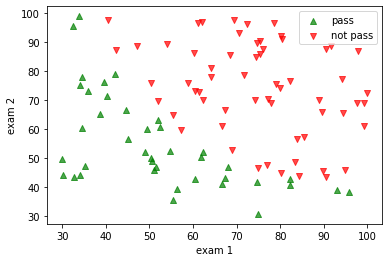

In [2]:
classifier.plotScatter(data_file1)

res:       fun: 0.20349770158947486
     jac: array([8.94349009e-09, 8.10172580e-08, 4.74111354e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131857,   0.20623159,   0.20147149])
<class 'numpy.ndarray'>


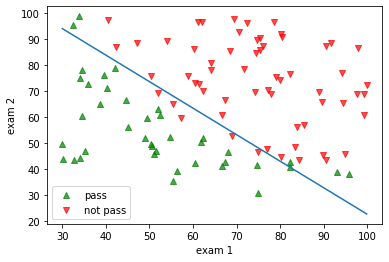

In [3]:

X, y = classifier.loadData(data_file1) # 将数据集中的：坐标给X(numpy.ndarray类型)，label给Y
m, n = X.shape 
X = np.c_[np.ones((m, 1)), X]  # 行数不变，组合列数，(100,1)的值全为1的矩阵与X进行合并
y = np.c_[y] # TODO: 此行很重要，将原本shape为(100,)的y变成(100,1)，防止死循环  #
initial_theta = np.zeros(X.shape[1])
res = op.minimize(classifier.costFunction, initial_theta, args=(X, y), method='TNC', jac=classifier.gradient, options={'maxiter': 400})
print("res: ",res)
theta = res.x
classifier.decisionBoundary(theta, data_file1)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


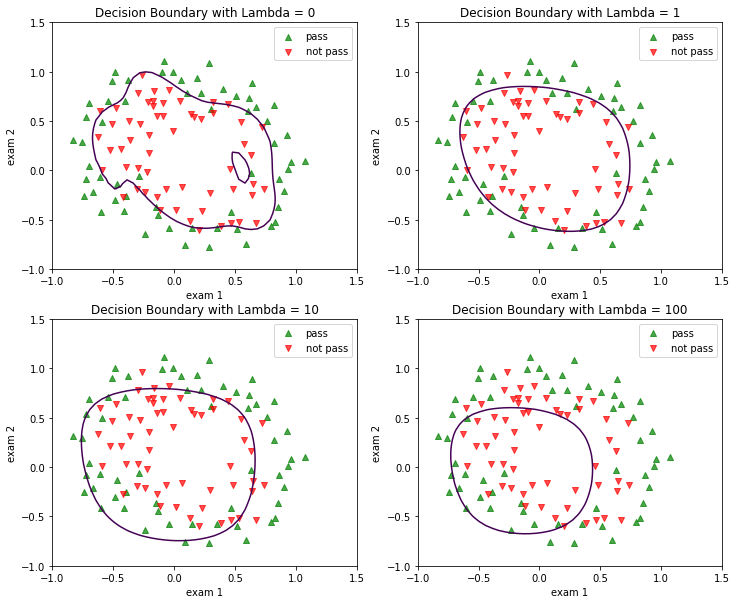

In [6]:
X, y = classifier.loadData(data_file2)
m, n = X.shape
X = np.c_[np.ones((m, 1)), X]  # 同上
y = np.c_[y]
X = classifier.mapFeature(X[:, 1], X[:, 2])
initial_theta = np.zeros(X.shape[1])
classifier.subplotDecisionBoundary(data_file2, initial_theta, X, y)
plt.show()